In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [246]:
data=pd.read_csv("1000 Records.csv")
data.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


In [247]:
data.isna().sum()

Emp ID                    0
Name Prefix               0
First Name                0
Middle Initial            0
Last Name                 0
Gender                    0
E Mail                    0
Father's Name             0
Mother's Name             0
Mother's Maiden Name      0
Date of Birth             0
Time of Birth             0
Age in Yrs.               0
Weight in Kgs.            0
Date of Joining           0
Quarter of Joining        0
Half of Joining           0
Year of Joining           0
Month of Joining          0
Month Name of Joining     0
Short Month               0
Day of Joining            0
DOW of Joining            0
Short DOW                 0
Age in Company (Years)    0
Salary                    0
Last % Hike               0
SSN                       0
Phone No.                 0
Place Name                0
County                    0
City                      0
State                     0
Zip                       0
Region                    0
User Name           

In [248]:
data.shape

(1000, 37)

In [249]:
data.describe(include='all')

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
count,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000.000000,1000,1000,1000
unique,NaN,7,792,26,640,2,1000,1000,1000,634,...,1000,1000,880,582,880,50,NaN,4,998,1000
top,NaN,Mr.,Luther,J,Carney,M,chrystal.swanson@aol.com,Prince Hodge,Wilma Wilkins,Snyder,...,478-43-6952,216-500-1514,Saint Louis,Jefferson,Saint Louis,PA,NaN,South,pnkoch,d[\@[none{!X:*
freq,NaN,347,3,48,7,509,1,1,1,6,...,1,1,5,15,5,62,NaN,371,2,1
mean,549097.583000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48698.499000,NaN,NaN,NaN
std,264810.879315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27396.021481,NaN,NaN,NaN
min,114425.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1002.000000,NaN,NaN,NaN
25%,307757.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25421.750000,NaN,NaN,NaN
50%,543073.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,47416.500000,NaN,NaN,NaN
75%,788450.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,71101.000000,NaN,NaN,NaN


Few columns have very little importance in terms of prediction of salary; let's drop them.

In [250]:
data=data.drop(['Emp ID','First Name','Middle Initial','E Mail',"Father's Name","Mother's Name","Mother's Maiden Name"],axis=1)

In [251]:
data=data.drop(['Last Name','Date of Birth','Time of Birth','Date of Joining',"Half of Joining","SSN","Place Name","County","City","Zip","User Name","Password"],axis=1)

In [252]:
data=data.drop(["Month of Joining","Month Name of Joining","Day of Joining","DOW of Joining"],axis=1)

In [253]:
data.describe()

,Age in Yrs.,Weight in Kgs.,Year of Joining,Age in Company (Years),Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.377250,59.409000,2006.992000,10.093720,120288.528000
std,11.107729,13.900322,8.565588,8.568863,45178.339916
min,21.040000,40.000000,1980.000000,0.000000,40040.000000
25%,30.925000,49.000000,2002.000000,3.152500,82122.000000
50%,40.730000,57.000000,2009.000000,7.815000,119409.000000
75%,49.852500,68.000000,2014.000000,15.465000,159109.000000
max,59.980000,90.000000,2017.000000,37.570000,199943.000000


In [254]:
stats.skew(data['Age in Company (Years)'])

0.9667576252545313

(array([284., 200., 148., 105., 109.,  50.,  37.,  33.,  23.,  11.]),
 array([ 0.   ,  3.757,  7.514, 11.271, 15.028, 18.785, 22.542, 26.299,
        30.056, 33.813, 37.57 ]),
 <a list of 10 Patch objects>)

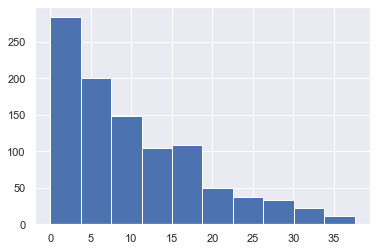

In [255]:
plt.hist(data['Age in Company (Years)'])

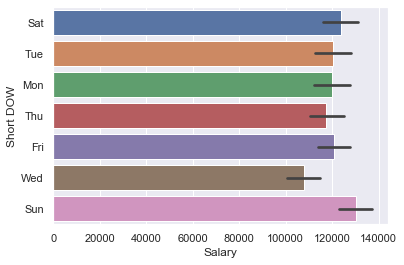

In [256]:
sns.set()
sns.barplot(data['Salary'],data['Short DOW'])

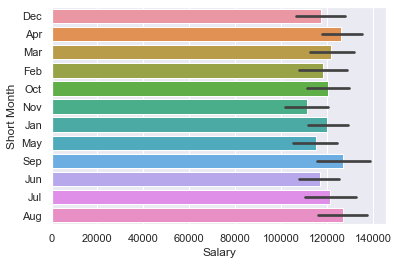

In [257]:
sns.barplot(data['Salary'],data['Short Month'])
plt.show()

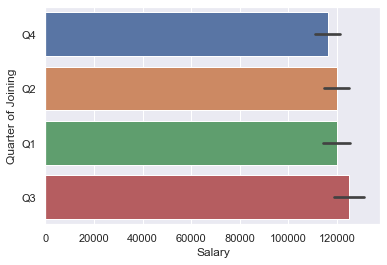

In [258]:
sns.barplot(data['Salary'],data['Quarter of Joining'])
plt.show()

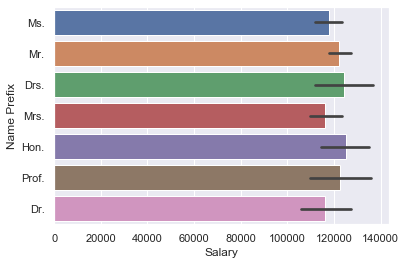

In [259]:
sns.set()
sns.barplot(data['Salary'],data['Name Prefix'])
plt.show()

In [260]:
col_n=data.columns
col_n

Index(['Name Prefix', 'Gender', 'Age in Yrs.', 'Weight in Kgs.',
       'Quarter of Joining', 'Year of Joining', 'Short Month', 'Short DOW',
       'Age in Company (Years)', 'Salary', 'Last % Hike', 'Phone No. ',
       'State', 'Region'],
      dtype='object')

In [261]:
Col_m=['Name Prefix', 'Gender','Quarter of Joining', 'Year of Joining', 'Short Month', 'Short DOW', 'State', 'Region']

In [262]:
for g in Col_m:
    lala=LabelEncoder()
    data[g]=lala.fit_transform(data[g])

In [263]:
data

,Name Prefix,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Year of Joining,Short Month,Short DOW,Age in Company (Years),Salary,Last % Hike,Phone No.,State,Region
0,5,0,45.66,44,3,30,2,2,6.61,119090,17%,702-771-7149,32,3
1,3,1,23.76,52,1,37,0,5,0.26,117991,14%,231-765-6923,21,0
2,1,0,22.68,42,0,37,7,1,0.34,161045,28%,270-749-4774,16,2
3,4,0,41.70,43,0,23,3,5,14.43,142616,16%,219-623-8216,14,0
4,2,0,22.39,58,3,36,10,5,0.79,135706,11%,907-677-8486,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,0,32.01,59,0,28,4,1,9.56,72930,10%,262-696-9171,47,0
996,3,1,30.48,84,0,30,7,0,7.40,121949,16%,231-629-0498,21,0
997,2,0,59.88,50,0,21,3,5,16.44,82734,14%,209-912-6705,4,3
998,4,0,30.21,48,0,32,7,4,5.37,66854,9%,203-224-9056,6,1


In [264]:
data['Last % Hike']=[float(g.strip('%')) for g in data['Last % Hike']]

In [265]:
data.describe()

,Name Prefix,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Year of Joining,Short Month,Short DOW,Age in Company (Years),Salary,Last % Hike,State,Region
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.380000,0.509000,40.377250,59.409000,1.489000,26.992000,5.31200,2.925000,10.093720,120288.528000,15.473000,24.518000,1.410000
std,1.519839,0.500169,11.107729,13.900322,1.113157,8.565588,3.50013,2.008335,8.568863,45178.339916,8.984096,14.228638,1.066319
min,0.000000,0.000000,21.040000,40.000000,0.000000,0.000000,0.00000,0.000000,0.000000,40040.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,30.925000,49.000000,1.000000,22.000000,2.00000,1.000000,3.152500,82122.000000,8.000000,13.000000,0.000000
50%,3.000000,1.000000,40.730000,57.000000,1.000000,29.000000,5.00000,3.000000,7.815000,119409.000000,16.000000,24.000000,2.000000
75%,5.000000,1.000000,49.852500,68.000000,3.000000,34.000000,8.00000,5.000000,15.465000,159109.000000,23.000000,37.000000,2.000000
max,6.000000,1.000000,59.980000,90.000000,3.000000,37.000000,11.00000,6.000000,37.570000,199943.000000,30.000000,49.000000,3.000000


In [266]:
data=data.drop('Phone No. ',axis=1)

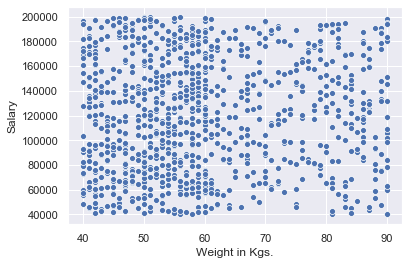

In [267]:
sns.set()
sns.scatterplot(data['Weight in Kgs.'],data['Salary'])
plt.show()

In [268]:
data=data.drop('Weight in Kgs.',axis=1)

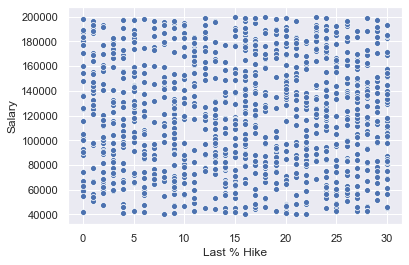

In [269]:
sns.scatterplot(data["Last % Hike"],data["Salary"])

In [270]:
df=pd.get_dummies(data=data)
df

,Name Prefix,Gender,Age in Yrs.,Quarter of Joining,Year of Joining,Short Month,Short DOW,Age in Company (Years),Salary,Last % Hike,State,Region
0,5,0,45.66,3,30,2,2,6.61,119090,17.0,32,3
1,3,1,23.76,1,37,0,5,0.26,117991,14.0,21,0
2,1,0,22.68,0,37,7,1,0.34,161045,28.0,16,2
3,4,0,41.70,0,23,3,5,14.43,142616,16.0,14,0
4,2,0,22.39,3,36,10,5,0.79,135706,11.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,0,32.01,0,28,4,1,9.56,72930,10.0,47,0
996,3,1,30.48,0,30,7,0,7.40,121949,16.0,21,0
997,2,0,59.88,0,21,3,5,16.44,82734,14.0,4,3
998,4,0,30.21,0,32,7,4,5.37,66854,9.0,6,1


In [271]:
y=data['Salary']
x=data.drop('Salary',axis=1)

In [272]:
y.head()

0    119090
1    117991
2    161045
3    142616
4    135706
Name: Salary, dtype: int64

In [273]:
x.head()

,Name Prefix,Gender,Age in Yrs.,Quarter of Joining,Year of Joining,Short Month,Short DOW,Age in Company (Years),Last % Hike,State,Region
0,5,0,45.66,3,30,2,2,6.61,17.0,32,3
1,3,1,23.76,1,37,0,5,0.26,14.0,21,0
2,1,0,22.68,0,37,7,1,0.34,28.0,16,2
3,4,0,41.70,0,23,3,5,14.43,16.0,14,0
4,2,0,22.39,3,36,10,5,0.79,11.0,0,3


In [274]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25)

In [275]:
p_linear_reg=Pipeline([('Scalar',StandardScaler()),('Linear Regression',LinearRegression())])
p_linear_reg.fit(X_train,y_train)
print(r2_score(p_linear_reg.predict(X_test),y_test),mean_squared_error(p_linear_reg.predict(X_test),y_test))

-53.62624057018975 2071742733.0415075


In [276]:
p_rand_f=Pipeline([('Scalar',StandardScaler()),('Random Forest Regression',RandomForestRegressor())])
p_rand_f.fit(X_train,y_train)
r2_score(p_rand_f.predict(X_test),y_test)

-10.779574080488201

In [277]:
p_nb=Pipeline([('NB',GaussianNB())])
p_nb.fit(X_train,y_train)
r2_score(p_nb.predict(X_test),y_test)

-31.099356638788933

This are all very very bad models. The reason may be that there is no pattern inherent in the data, the target variable has no correlation with any of the input data.

In [278]:
data.corr()

,Name Prefix,Gender,Age in Yrs.,Quarter of Joining,Year of Joining,Short Month,Short DOW,Age in Company (Years),Salary,Last % Hike,State,Region
Name Prefix,1.000000,-0.352139,0.023223,-0.007585,-0.040442,0.013255,-0.002460,0.040800,-0.022343,0.049796,-0.003233,-0.030759
Gender,-0.352139,1.000000,-0.013794,0.016359,0.047214,-0.027336,0.062954,-0.047735,0.050883,0.030573,0.053496,-0.018187
Age in Yrs.,0.023223,-0.013794,1.000000,0.020401,-0.676875,0.009433,0.018045,0.676408,0.041422,-0.030761,0.013822,-0.018768
Quarter of Joining,-0.007585,0.016359,0.020401,1.000000,-0.032659,0.275013,-0.059249,0.000146,-0.015299,-0.021450,0.075757,0.005490
Year of Joining,-0.040442,0.047214,-0.676875,-0.032659,1.000000,-0.030901,-0.013651,-0.999435,-0.053501,0.008960,-0.015407,0.007374
Short Month,0.013255,-0.027336,0.009433,0.275013,-0.030901,1.000000,-0.010196,0.020292,-0.038814,0.028504,-0.010565,0.004313
Short DOW,-0.002460,0.062954,0.018045,-0.059249,-0.013651,-0.010196,1.000000,0.015406,-0.070859,0.015006,-0.005470,-0.056675
Age in Company (Years),0.040800,-0.047735,0.676408,0.000146,-0.999435,0.020292,0.015406,1.000000,0.054212,-0.008238,0.012947,-0.007932
Salary,-0.022343,0.050883,0.041422,-0.015299,-0.053501,-0.038814,-0.070859,0.054212,1.000000,-0.005366,0.014573,-0.027460
Last % Hike,0.049796,0.030573,-0.030761,-0.021450,0.008960,0.028504,0.015006,-0.008238,-0.005366,1.000000,-0.027141,0.013904


One can see that from this correlation 

In [279]:
joblib.dump(p_nb,'NBG.pkl')

['NBG.pkl']